In [1]:
# General Imports
import tensorflow as tf
import pandas as pd
import numpy as np
import random
import os
import kagglehub
import cv2

from tensorflow import keras
# Visualization
import matplotlib.pyplot as plt

# Building Model
from keras.utils import plot_model
from tensorflow.keras import models
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import legacy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Training Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers

# Data Processing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Accuracy
from sklearn.metrics import accuracy_score

In [2]:
#Download data set and get the path
path = "dataset"
print("Path to dataset files:", path);

Path to dataset files: dataset


In [3]:
train_dir = path + "/Training"
test_dir = path + "/Testing"
validation_dir = path + "/Validation"
#train_dataset = train_dir.flow_from_directory(train_dir, target_size=(250,250))
#test_dataset = test_dir.flow_from_directory(test_dir, target_size=(250,250))

In [4]:
#for getting class indices
datagen = ImageDataGenerator(rescale=1./255)
datagenTrain = ImageDataGenerator(rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_dataset = datagenTrain.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
validation_dataset = datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
test_dataset = datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)
print(train_dataset.class_indices)
print(train_dataset.classes)
print(f"Test {test_dataset.class_indices}")
print(f"Test {test_dataset.classes}")
print(validation_dataset.class_indices)
print(validation_dataset.classes)

Found 4564 images belonging to 4 classes.
Found 1040 images belonging to 4 classes.
Found 880 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
[0 0 0 ... 3 3 3]
Test {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Test [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [5]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [6]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [7]:
#utilizing cnn with maxpooling, and all the layers are given in a form of list, one by one we provide the layers, 
# so Conv2D(how many filters you want to keep inside this layer which is how many features to learn from, 
# (size of the filters), activation function, input_shape=(256, 256, 3-->dimension because rgb) )
def create_model(learning_rate):
    model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.BatchNormalization(),
                                    #then adding a max pooling layer
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                            

                                    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                                    tf.keras.layers.Dropout(0.5),
                                    #4 because 4 classes
                                    #softmax because we have multiple classes and not binary
                                    tf.keras.layers.Dense(4, activation='softmax')])
    model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate=learning_rate),
              metrics=['accuracy'])
    return model
    

In [8]:
history_dict = {
    'learning-rates' : [0.01, 0.001, 0.0001, 0.00001],
    'acc': []
}

for lr in history_dict['learning-rates']:
    print(f"learning rate: {lr}")
    model = create_model(lr)
    cnn_model = model.fit(train_dataset,
          epochs=20,
          validation_data=validation_dataset,
          callbacks=[callback]) 
    
    history_dict['acc'].append(cnn_model.history['val_accuracy'][-1])

learning_rates = np.array(history_dict['learning-rates'])
acc = np.array(history_dict['acc'])


learning rate: 0.01


/Users/turkan/Desktop/VU/ML/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/turkan/Desktop/VU/ML/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 236ms/step - accuracy: 0.4715 - loss: 4.3260 - val_accuracy: 0.2462 - val_loss: 7.7089
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 238ms/step - accuracy: 0.5785 - loss: 1.4227 - val_accuracy: 0.4721 - val_loss: 1.5331
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 242ms/step - accuracy: 0.6433 - loss: 1.1938 - val_accuracy: 0.6279 - val_loss: 1.0443
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 236ms/step - accuracy: 0.6819 - loss: 0.9627 - val_accuracy: 0.5462 - val_loss: 1.4818
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 34s 237ms/step - accuracy: 0.7305 - loss: 0.8462 - val_accuracy: 0.4663 - val_loss: 1.8861
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 33s 229ms/step - accuracy: 0.7307 - loss: 0.8474 - val_accuracy: 0.3029 - val_loss: 5.8367
learning rate: 0.001
Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 36s 240ms/step - accuracy: 0.4949 - loss: 4.4569 - val_accuracy: 0.2615 - val_loss: 6.0952
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 35s 243ms/step - accur

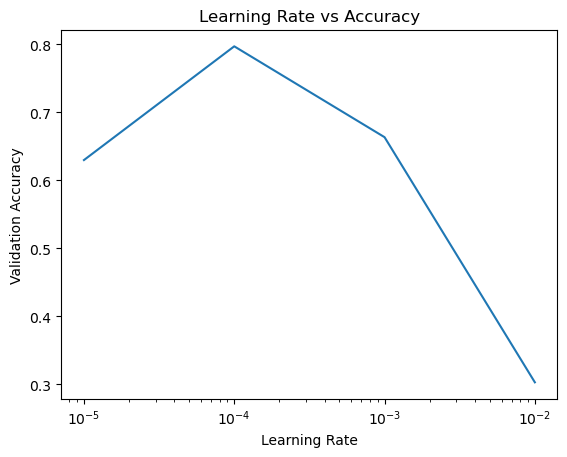

In [9]:
plt.plot(learning_rates, acc)
plt.xscale('log')  
plt.xlabel('Learning Rate')
plt.ylabel('Validation Accuracy')
plt.title('Learning Rate vs Accuracy')
plt.savefig("lr-acc.png")
plt.show()

In [10]:
# Get predictions for test dataset
y_pred_probs = model.predict(test_dataset)
y_pred = np.argmax(y_pred_probs, axis=1)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


In [11]:
misclassified_list = []
print(len(y_pred))
for i in range(len(y_pred)):
    if y_pred[i] != test_dataset.classes[i]:
        misclassified_list.append(i)

880


In [12]:
cout = misclassified_list.__len__()
glioma = 0 
glioma_1 = 0
glioma_2 = 0
glioma_3 = 0
meningiona = 0
meningiona_0 = 0
meningiona_2 = 0
meningiona_3 = 0
notumor = 0
notumor_0 = 0
notumor_1 = 0
notumor_3 = 0

pit = 0
pit_0 = 0
pit_1 = 0
pit_2 = 0

print(cout)
for i in misclassified_list[:1040]:
    img = cv2.imread(test_dataset.filepaths[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if(test_dataset.classes[i] == 0 and y_pred[i] != 0):
        if(y_pred[i] == 1):
            glioma_1 += 1
        elif(y_pred[i] == 2):
            glioma_2 += 1
        elif(y_pred[i] == 3):
            glioma_3 += 1
        glioma += 1
    elif(test_dataset.classes[i] == 1 and y_pred[i] != 1):
        if(y_pred[i] == 0):
            meningiona_0 += 1
        elif(y_pred[i] == 2):
            meningiona_2 += 1
        elif(y_pred[i] == 3):
            meningiona_3 += 1
        meningiona += 1
    elif(test_dataset.classes[i] == 2 and y_pred[i] != 2):
        if(y_pred[i] == 0):
            notumor_0 += 1
        elif(y_pred[i] == 1):
            notumor_1 += 1
        elif(y_pred[i] == 3):
            notumor_3 += 1
        notumor += 1
    elif(test_dataset.classes[i] == 3 and y_pred[i] != 3):
        if(y_pred[i] == 0):
            pit_0 += 1
        elif(y_pred[i] == 1):
            pit_1 += 1
        elif(y_pred[i] == 2):
            pit_2 += 1
        pit += 1
    # print(f"Actual: {test_dataset.classes[i]}, Predicted: {y_pred[i]}")
    #plt.imshow(img) 
    #plt.title(f"Actual: {test_dataset.classes[i]}, Predicted: {y_pred[i]}")

print(f"Glioma:{glioma}")
print(f"Glioma as meningiona: {glioma_1}")
print(f"Glioma as no tumor: {glioma_2}")
print(f"Glioma as pituitary: {glioma_3}")

print(f"Meningiona: {meningiona}")
print(f"Meningiona as glioma: {meningiona_0}")
print(f"Meningiona as no tumor: {meningiona_2}")
print(f"Meningiona as pituitary: {meningiona_3}")

print(f"No Tumor: {notumor}")
print(f"No Tumor as glioma: {notumor_0}")
print(f"No Tumor as meningiona: {notumor_1}")
print(f"No Tumor as pituitary: {notumor_3}")

print(f"Pituitary: {pit}")
print(f"Pituitary as glioma: {pit_0}")
print(f"Pituitary as meningiona: {pit_1}")
print(f"Pituitary as no tumor: {pit_2}")

print(f"Total Misclassified: {cout}")

672
Glioma:187
Glioma as meningiona: 29
Glioma as no tumor: 86
Glioma as pituitary: 72
Meningiona: 200
Meningiona as glioma: 42
Meningiona as no tumor: 86
Meningiona as pituitary: 72
No Tumor: 126
No Tumor as glioma: 38
No Tumor as meningiona: 23
No Tumor as pituitary: 65
Pituitary: 159
Pituitary as glioma: 46
Pituitary as meningiona: 20
Pituitary as no tumor: 93
Total Misclassified: 672


In [13]:

y_true = test_dataset.classes
class_labels = list(test_dataset.class_indices.keys())

class_accuracies = {}
for class_id, class_name in enumerate(class_labels):
    class_mask = (y_true == class_id)
    class_accuracy = accuracy_score(y_true[class_mask], y_pred[class_mask])
    class_accuracies[class_name] = class_accuracy

# Print results
for class_name, accuracy in class_accuracies.items():
    print(f"Accuracy for class {class_name}: {accuracy:.2%}")

Accuracy for class glioma: 15.00%
Accuracy for class meningioma: 9.09%
Accuracy for class notumor: 42.73%
Accuracy for class pituitary: 27.73%


In [13]:
#baseline for t-test
model = keras.Sequential([
        layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
        layers.MaxPooling2D(2,2),
        layers.Flatten(),
        layers.Dense(32, activation='relu'),
        layers.Dense(4, activation='softmax')  
    ])
    
model.compile(loss='categorical_crossentropy', 
              optimizer = Adam(learning_rate=0.0001),
              metrics=['accuracy'])

ccn_model = model.fit(train_dataset,
          epochs=5,
          validation_data=validation_dataset,
          callbacks=[callback]) 

Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.3156 - loss: 1.3193 - val_accuracy: 0.5346 - val_loss: 1.0740
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.5392 - loss: 1.0854 - val_accuracy: 0.4423 - val_loss: 1.2250
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.5947 - loss: 0.9833 - val_accuracy: 0.5058 - val_loss: 1.1444
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 124ms/step - accuracy: 0.6270 - loss: 0.9243 - val_accuracy: 0.6423 - val_loss: 0.9681
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 123ms/step - accuracy: 0.6391 - loss: 0.8961 - val_accuracy: 0.6163 - val_loss: 1.0326


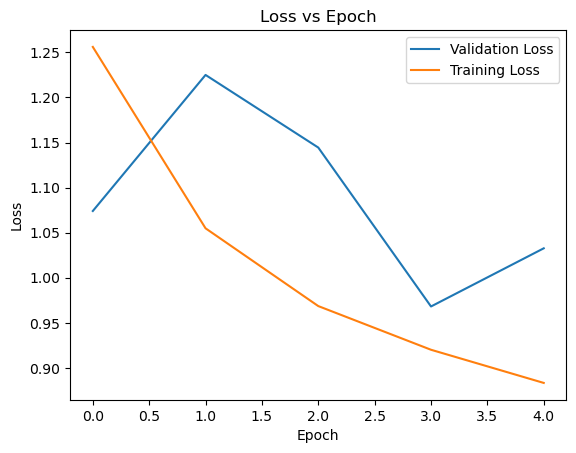

In [14]:
plt.plot(ccn_model.history['val_loss'], label='Validation Loss')
plt.plot(ccn_model.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig("epoch-loss-baseline.png")
plt.show()

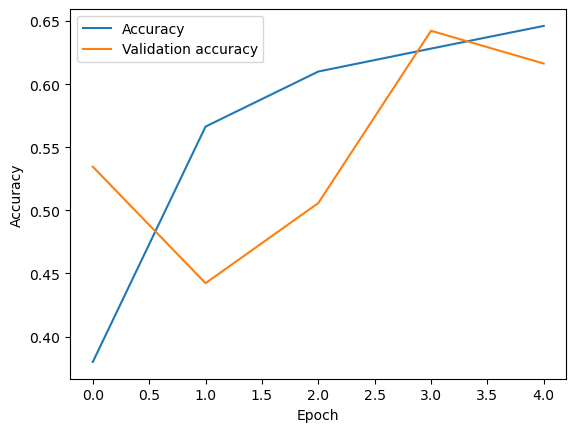

In [15]:
plt.plot(ccn_model.history['accuracy'], label='Accuracy')
plt.plot(ccn_model.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("epoch-acc-baseline.png")
plt.show()